DATASET CINEMA
1. CONTEXTO Y USO 

En La industria cinematográfica podemos utilizar  los modelos predictivos. Al igual que en otras industrias, comercio  la banca y la restaurantes, la previsión de ventas puede ayudar a los cines a reducir costes y mejorar el retorno de la inversión. adicionalmnete optimizar la proyección en diferentes lugares, así como la segmentación y fijación de precios del mercado de forma eficaz.

Asimismo, los datos históricos de ventas y detalles de las películas, como el coste, el reparto y el equipo, y otros detalles del proyecto, como el calendario, pueden ayudar a los productores a seleccionar un reparto y un equipo de alto rendimiento y planificar un mejor retorno de la inversión de los proyectos. También ayuda a asignar lugares de proyección en puntos y áreas de gran demanda.

Fuente: Kaggle 
link: https://www.kaggle.com/datasets/arashnic/cinema-ticket

2. Objetivo Clasificacion 
// consulto a chatgpt que podria clasificar, (predicion de ocupacion, prediccion de ventas de entradas, prediccion de ventas de ingresos) esta ultima me llama la atencion

Predicción de Ingresos: (total_sales)

Entrada: Datos como la cantidad de entradas vendidas, el precio del boleto, y la ubicación del cine.
Predicción: El modelo podría predecir que los ingresos generados estarán en la categoría "Alto" (más del 80% del rango de ingresos posibles).


https://chatgpt.com/c/a892a6d5-7528-4ef0-aa71-84a33b222163

se deberia predecir dentro de las 5 categorias Bajo, Medio Bajo, Medio, Medio

3. IMPORTACIONES 

In [744]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from statsmodels.tsa.arima.model import ARIMA

In [745]:

df = pd.read_csv("cinemaTicket.csv")
df.info()


df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


4. lIMPIEZA DE DATOS

>Limpieza de datos (imputar o eliminar valores])
Eliminación de Duplicados: Identificar y eliminar registros duplicados.
Corrección de Errores: Corregir errores o inconsistencias en los datos

In [746]:


#  DataFrame df validacion de datos nulos
print(df.isnull().sum())


film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64


Elimino las filas vacias debido a que representan un 0.088 % de los datos de las

In [747]:
df.describe()
df = df.dropna(subset=['occu_perc', 'capacity'])


Elimino columnas innecesarias y reordeno el dataframe

In [748]:
print(df.columns)
df.drop(columns=['total_sales','tickets_out','ticket_use','ticket_price'], inplace=True)

 #Obtener el nombre de la tercera columna
columna_a_predecir  = df.columns[2] #tickets_sold

# Crear una nueva lista de columnas reordenada
columnas_reordenadas = [col for col in df.columns if col != columna_a_predecir ] + [columna_a_predecir ]

# Reordenar las columnas del DataFrame
df = df[columnas_reordenadas]


# Convertir características categóricas fecha a-->ordinal
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(lambda x: x.toordinal())  # Convertir fechas a ordinales
# Truncar la columna decimal a enteros
df['capacity'] = df['capacity'].astype(int)
df

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')


,film_code,cinema_code,show_time,occu_perc,capacity,date,month,quarter,day,tickets_sold
0,1492,304,4,4.26,610,736819,5,2,5,26
1,1492,352,5,8.08,519,736819,5,2,5,42
2,1492,489,4,20.00,160,736819,5,2,5,32
3,1492,429,1,11.01,108,736819,5,2,5,12
4,1492,524,3,16.67,89,736819,5,2,5,15
...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,2,3.86,569,737002,11,4,4,22
142520,1569,474,1,65.22,22,737002,11,4,4,15
142521,1569,524,3,9.20,86,737002,11,4,4,8
142522,1569,529,2,5.00,100,737002,11,4,4,5


In [749]:
# Características y etiqueta
X = ['film_code','cinema_code','show_time', 'occu_perc', 'capacity', 'date', 'month', 'quarter', 'day']
y = ['tickets_sold']

print('valores de x:',X)
print('valores de y:',y)


valores de x: ['film_code', 'cinema_code', 'show_time', 'occu_perc', 'capacity', 'date', 'month', 'quarter', 'day']
valores de y: ['tickets_sold']


In [750]:
# Convertir DataFrame a matriz numpy
dataset = df.values

# Estandarización
standard_scaler = StandardScaler()
dataset_standardized = standard_scaler.fit_transform(dataset)

# Escalado
minmax_scaler = MinMaxScaler()
dataset_scaled = minmax_scaler.fit_transform(dataset)

# Mostrar resultados
print('Dataset Original:')
print(dataset)

print('\nDataset Estandarizado:')
print(dataset_standardized)

print('\nDataset Escalado:')
print(dataset_scaled)


Dataset Original:
[[1.492e+03 3.040e+02 4.000e+00 ... 2.000e+00 5.000e+00 2.600e+01]
 [1.492e+03 3.520e+02 5.000e+00 ... 2.000e+00 5.000e+00 4.200e+01]
 [1.492e+03 4.890e+02 4.000e+00 ... 2.000e+00 5.000e+00 3.200e+01]
 ...
 [1.569e+03 5.240e+02 3.000e+00 ... 4.000e+00 4.000e+00 8.000e+00]
 [1.569e+03 5.290e+02 2.000e+00 ... 4.000e+00 4.000e+00 5.000e+00]
 [1.569e+03 4.860e+02 1.000e+00 ... 4.000e+00 4.000e+00 5.000e+00]]

Dataset Estandarizado:
[[-0.74588967 -0.10255142  0.0216292  ... -0.78435478 -1.24178213
  -0.4082007 ]
 [-0.74588967  0.19810563  0.3487642  ... -0.78435478 -1.24178213
  -0.35099823]
 [-0.74588967  1.05623094  0.0216292  ... -0.78435478 -1.24178213
  -0.38674977]
 ...
 [ 1.38212067  1.27546004 -0.30550581 ...  1.68658315 -1.35353137
  -0.47255348]
 [ 1.38212067  1.30677848 -0.63264081 ...  1.68658315 -1.35353137
  -0.48327894]
 [ 1.38212067  1.03743988 -0.95977581 ...  1.68658315 -1.35353137
  -0.48327894]]

Dataset Escalado:
[[1.77966102e-01 5.09363296e-01 5.08474

5. TRASNFORMACION DE DATOS 
>Normalización/Estándarización: Escalar datos para que estén en un rango o distribución específica.
Codificación de Variables Categóricas: Convertir variables categóricas en variables numéricas (e.g., One-Hot Encoding).
Transformación de Fechas: Extraer características de fechas como año, mes, día, etc.  

 aplico normalizacion con el metodo de:
 >Min-Max Scaling 
  Z-score

  Estrategia: 
  No Normalizar: Identificadores y fechas.
  Normalizar: Características numéricas continuas y rangos amplios.

In [751]:
#la data se divide en datos numericos y categoricos, puedo usar ambos sin embargo se sugiere
#1. separar los tipos de datos
#2. standarizar o normalizar Z-score y luego normalizar Min-Max[0,1]  


6. ALMACENAMOS EN UN ARRAY

In [752]:
dataset = df.values
dataset

array([[1.492e+03, 3.040e+02, 4.000e+00, ..., 2.000e+00, 5.000e+00,
        2.600e+01],
       [1.492e+03, 3.520e+02, 5.000e+00, ..., 2.000e+00, 5.000e+00,
        4.200e+01],
       [1.492e+03, 4.890e+02, 4.000e+00, ..., 2.000e+00, 5.000e+00,
        3.200e+01],
       ...,
       [1.569e+03, 5.240e+02, 3.000e+00, ..., 4.000e+00, 4.000e+00,
        8.000e+00],
       [1.569e+03, 5.290e+02, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        5.000e+00],
       [1.569e+03, 4.860e+02, 1.000e+00, ..., 4.000e+00, 4.000e+00,
        5.000e+00]])

In [753]:
X = dataset[:,0:9] # todas las filas _:_ y 10 columnas   0:10
Y  = dataset[:,9] # aignamos nuestra ultima columna de nuestra matriz a Y

In [754]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale  

array([[0.1779661 , 0.5093633 , 0.05084746, ..., 0.33333333, 0.33333333,
        0.13333333],
       [0.1779661 , 0.59925094, 0.06779661, ..., 0.33333333, 0.33333333,
        0.13333333],
       [0.1779661 , 0.85580524, 0.05084746, ..., 0.33333333, 0.33333333,
        0.13333333],
       ...,
       [0.83050847, 0.92134831, 0.03389831, ..., 1.        , 1.        ,
        0.1       ],
       [0.83050847, 0.93071161, 0.01694915, ..., 1.        , 1.        ,
        0.1       ],
       [0.83050847, 0.85018727, 0.        , ..., 1.        , 1.        ,
        0.1       ]])

In [755]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

#datos entrenamiento 99679
#datos prueba 21360


(99679, 9) (21360, 9) (21360, 9) (99679,) (21360,) (21360,)


7.CONSTRUIR Y ENTRENAR EL MODELO


In [756]:
from keras.models import Sequential
from keras.layers import Dense
#usa tensor flow en el backend

from keras.callbacks import EarlyStopping


model = Sequential([
    Dense(12, activation='relu', input_shape=(9,)),
    Dense(6, activation='relu'),
    Dense(1, activation='linear')  # activation='linear -> regreseion  /  activation='sigmoid' -> clasificación binaria
])

model.compile(optimizer = 'adam', #sgd es valido pero adam converge mas rapido
              loss='mse',       #regresion usar  mse
              metrics=['mae'])  

hist = model.fit(X_train, Y_train,
          batch_size=64, 
          epochs=100,
          validation_data =(X_val, Y_val),
          callbacks=[early_stopping])
         # )
          

#evaluando el modelo
model.evaluate(X_test, Y_test)





Epoch 1/100


c:\Users\julig\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1558/1558 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 85892.4062 - mae: 133.7320 - val_loss: 61810.3086 - val_mae: 122.2285
Epoch 2/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 56616.3359 - mae: 110.3880 - val_loss: 38358.3438 - val_mae: 90.4456
Epoch 3/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 38351.2305 - mae: 90.5247 - val_loss: 32822.5156 - val_mae: 83.6361
Epoch 4/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 32059.8965 - mae: 81.9661 - val_loss: 28458.8105 - val_mae: 78.4744
Epoch 5/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 26280.0898 - mae: 76.1413 - val_loss: 24807.0996 - val_mae: 75.0335
Epoch 6/100
 965/1558 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 24673.5156 - mae: 73.0167 

KeyboardInterrupt: 

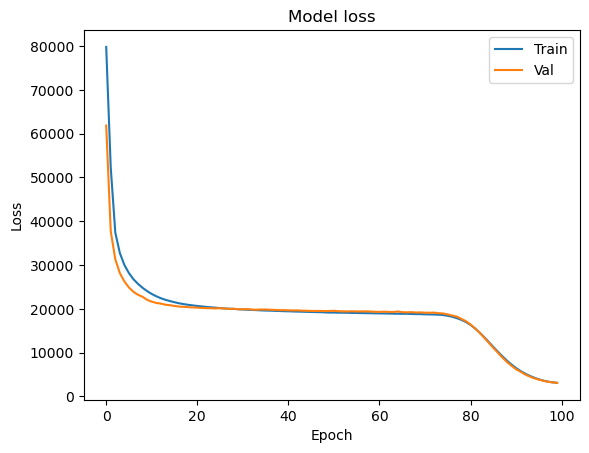

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()


8. Adicionar regularizacion 

In [ ]:
model_2 = Sequential([Dense(100, activation='relu', input_shape=(12,)),Dense(100, activation='relu'),Dense(100, activation='relu'),Dense(100, activation='relu'),Dense(1, activation='sigmoid'),])
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


hist_2 = model_2.fit(X_train, Y_train,batch_size=32, epochs=15,validation_data=(X_val, Y_val))
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()




Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_111" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (None, 9)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 9), dtype=float32)
  • training=True
  • mask=None

In [ ]:

#preddcion 
y_pred = model.predict(X_test)

#metricas de error
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test))*100

print(f'MAE:{mae}')
print(f'MAE:{mse}')
print(f'MAE:{rmse}')
print(f'MAE:{r2}')
print(f'MAE:{mape}')



#caluar metricas de KeyError
#mse 
#coeficiente de determinacion cercano a 1
#districucion 
#y_pred - Y_test



#jupiter notebooks
#semana 12
#Video


#reviusar formato.
#revisar columnas adecuadas
#datos que se envian al entrenamineto
#metrica binary coseentropy es la que deberia ?
#mse->
#mae->

#probar con arinma?





# puedo hacert escalamiento con estandar escaler, min max, pero hay otras fornmas
#cuando escalo al final debo desescalar para utilizar las mismas unidades del inico



##cuando entreno un modelo y observo que el valor de validation val empieza a crecer graficamnete el modelo se empiezxa a sobreajustar
##entonces debo hajustar la cantidad de iteraciones.



#el tamano de la red importa incluso es mejor menos neuronas que muchas 

#debo agregar regularizacion


#tener un numero de neuronas en la entrada debe corresponder al numnero de variables que utiliza mi dataset o numero de clases que utiliza el dataset

#entrada numero de var
# capa oculta 2^n 
#capa de salida 1

#Ejemplos Entrada 3 6 1

# con dos capas ocultas
# 3 32 16 1
#para la segunda capa es bueno dejar la mitad del numero de la primera capa   E  32 --> 16 S     E  8 -->4 S

# optimizadores
#loss=binary_crossentropy -> valores categioricos
#loss = mse -> valores reales (Numericos)



#REgresion y clasifgiccaicon
#MLPClassifier_network
#MLP_regresor

#matrizx de cionsfucion 


#tasas de regulariczacion 

#mean_squared_error


#dividir coinjunto y prueba

#partir escalar

#entrenamientop

#predicion



#estar seguro clasificacion matriz de consucion
#regfresion mse rmse 
#r2 
#y graficar distribucion de errores






SyntaxError: invalid syntax (2313867869.py, line 2)

Se realizan red con base en el articulo:
https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4